In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# import data
bitcoin = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")
df = pd.DataFrame(bitcoin).dropna(axis=0)

Checking the first 2 rows:

In [2]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-21,9718.07,9838.33,9728.25,9763.94,9763.94,4.624843e+10
1,2020-04-22,9762.68,10125.87,9747.39,10096.28,10096.28,4.716635e+10


Assign the 'Close' prices to the dependent (target) variable.

In [3]:
y = df["Close"]
print(y)

0       9763.94
1      10096.28
2      10451.16
3      10642.81
4      10669.64
         ...   
360    77018.32
361    75906.36
362    70374.91
363    69788.23
365    71477.76
Name: Close, Length: 362, dtype: float64


In [4]:
# select features 
X = df[["Open", "High", "Low", "Volume"]]
print(X)

         Open      High       Low        Volume
0     9718.07   9838.33   9728.25  4.624843e+10
1     9762.68  10125.87   9747.39  4.716635e+10
2    10102.09  10533.73  10009.76  6.119120e+10
3    10457.43  10678.71  10457.43  4.881932e+10
4    10642.22  10773.18  10601.61  4.643028e+10
..        ...       ...       ...           ...
360  79368.23  79831.47  75262.20  1.050000e+11
361  76964.70  78268.41  75503.00  8.272967e+10
362  75928.95  76373.72  66081.83  1.220000e+11
363  70344.11  71803.61  68107.27  8.183693e+10
365  71509.30  71556.76  71132.08  8.495634e+10

[362 rows x 4 columns]


## Splitting the Data
Using a 70-30 split for training and test sets.

In [5]:
df = df.copy()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Printing out the shape of the training sets gives:

In [7]:
print(X_train.shape)
print(y_train.shape)

(289, 4)
(289,)


And the shape of the test data:

In [8]:
print(X_test.shape)
print(y_test.shape)

(73, 4)
(73,)


## Feature Engineering and Model Selection
### Ridge Regression
Trying a different model and using an alpha learning rate of 1.0 to see if I can reduce the (rmse) error value and (r2) accuracy score.

In [9]:
# instantiate model
model = linear_model.Ridge(alpha=1.0)

# fit model
model.fit(X_train, y_train)

Ridge()

Now the 'training' data has been fit, try making a prediction on the first 5 values in the test set first.

In [10]:
price_predictions = model.predict(X_test)
print("Predictions: ", model.predict(X_test.iloc[:5]))

Predictions:  [14234.75510508 12650.97169728 13226.69171682 70421.08594755
 12744.62324963]


Now try a prediction by imputing my own values.

In [11]:
# predicting price based on Open = C$30,000, High = C$40,000, Low = C$29,000 and Volume = 100bn
model.predict([[30000, 40000, 29000, 100000000000]])

array([39073.11020224])

## Model Validation Metrics
Now to measure the error score and accuracy of the line of fit.

In [12]:
print("R-squared: ", model.score(X_test, y_test))

R-squared:  0.9986887109265141


635268.6314022379
797.0374090356348


Text(0.5, 1.0, 'Actual Prices vs Predicted Prices')

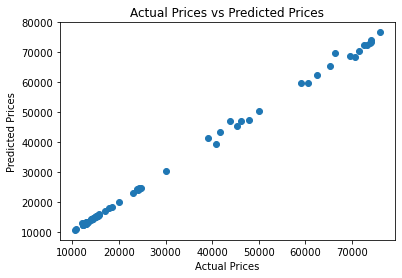

In [13]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

Finding the intercept and coefficients for each of the independent variables.

In [14]:
print(model.intercept_)
print(model.coef_)

109.3639690103737
[-4.67153068e-01  9.84108985e-01  4.71513892e-01 -5.99239883e-10]
